In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DS_salary_cleaned.csv')

In [3]:
df['Job Title'].value_counts()

Data Scientist                                                                       835
Data Engineer                                                                        117
Senior Data Scientist                                                                115
Senior Data Engineer                                                                  31
Principal Data Scientist                                                              17
Lead Data Scientist                                                                   15
Data Developer (Future Opportunities)                                                 14
Associate Scientist, LCMS                                                             14
Sr Principal Data Scientist                                                           13
Senior/Principal Scientist, Protein Sciences                                          13
Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics     12
Big Data Engineer    

In [4]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'City', 'State', 'Country', 'At_hq',
       'Company_age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Hadoop',
       'Tableau', 'Power_bi', 'BI', 'Min_revenue', 'Max_revenue',
       'Average_revenue'],
      dtype='object')

Return the job position title

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [6]:
df['Job Simplified']=df['Job Title'].apply(title_simplifier)

Specify if it's an entry level position or not

In [7]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [8]:
df['Job Senioriry']=df['Job Description'].apply(seniority)

Job description length

In [9]:
df['Desc Length']=df['Job Description'].apply(lambda x : len(x))

Number of Competitors

In [10]:
df['Competitors Length']=df['Competitors'].apply(lambda x:len(x.split(',')) if x !='-1' else 0) 

Take out the \n at the end of companies names

In [11]:
df['Company Name']=df['Company Name'].apply(lambda x:x.replace('\n',''))

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
Company Name          2000 non-null object
Competitors           2000 non-null object
Founded               2000 non-null int64
Headquarters          2000 non-null object
Industry              2000 non-null object
Job Description       2000 non-null object
Job Title             2000 non-null object
Location              2000 non-null object
Rating                2000 non-null float64
Revenue               2000 non-null object
Salary Estimate       2000 non-null object
Sector                2000 non-null object
Size                  2000 non-null object
Type of ownership     2000 non-null object
min_salary            2000 non-null int64
max_salary            2000 non-null int64
avg_salary            2000 non-null float64
City                  2000 non-null object
State                 2000 non-null object
Country               2000 non-null object
At_hq                 2000 non-nul

In [13]:
df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']]=df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']].astype('object') 

In [14]:
numerical_cols=df.select_dtypes(exclude='object')

categorical_cols=df.select_dtypes(include='object')

In [15]:
numerical_cols.describe()

,Founded,Rating,min_salary,max_salary,avg_salary,Company_age,Min_revenue,Max_revenue,Average_revenue,Desc Length,Competitors Length
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1679.432000,3.537400,81.33700,111.820000,96.578500,30.344500,1340.362000,1698.909500,1519.635750,3615.448500,0.720000
std,716.684585,1.259919,25.19162,26.778913,25.116832,38.533093,3085.853188,3368.311236,3194.491176,1683.068872,1.224479
min,-1.000000,-1.000000,31.00000,59.000000,47.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
25%,1939.000000,3.300000,61.00000,98.000000,79.500000,6.000000,0.000000,0.000000,0.000000,2508.000000,0.000000
50%,1996.000000,3.700000,83.00000,101.000000,92.000000,15.000000,25.000000,25.000000,22.500000,3430.500000,0.000000
75%,2008.000000,4.200000,99.00000,129.000000,116.500000,39.000000,500.000000,1000.000000,750.000000,4555.000000,2.000000
max,2020.000000,5.000000,145.00000,182.000000,163.500000,276.000000,10000.000000,10000.000000,10000.000000,10678.000000,4.000000


In [16]:
categorical_cols.describe()

,Company Name,Competitors,Headquarters,Industry,Job Description,Job Title,Location,Revenue,Salary Estimate,Sector,...,R,Spark,AWS,Excel,Hadoop,Tableau,Power_bi,BI,Job Simplified,Job Senioriry
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,541,150,269,58,616,200,241,14,37,25,...,2,2,2,2,2,2,2,2,7,3
top,Q2 Solutions,-1,"New York, NY",Biotech & Pharmaceuticals,We are seeking a Data Scientist Developer with...,Data Scientist,"New York, NY",Unknown / Non-Applicable,$83K-$101K (Glassdoor est.),Information Technology,...,0,0,0,0,0,0,0,0,data scientist,senior
freq,56,1458,115,291,14,835,122,646,275,558,...,1744,1454,1515,1915,1561,1659,1908,1911,1257,1424


### Numerical variables


In [17]:
numerical_cols.columns

Index(['Founded', 'Rating', 'min_salary', 'max_salary', 'avg_salary',
       'Company_age', 'Min_revenue', 'Max_revenue', 'Average_revenue',
       'Desc Length', 'Competitors Length'],
      dtype='object')

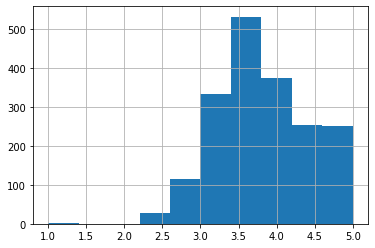

In [18]:
df[df['Rating']>=0]['Rating'].hist()
plt.show()

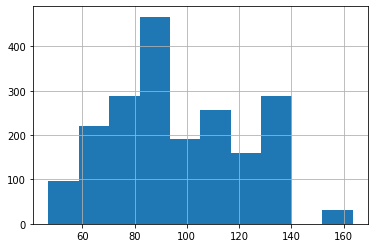

In [19]:
df['avg_salary'].hist()


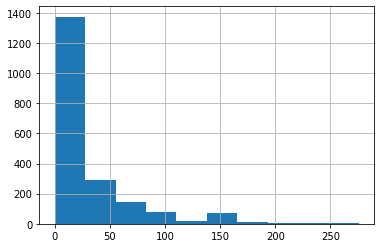

In [20]:
df['Company_age'].hist()


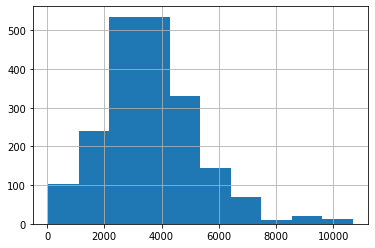

In [21]:
df['Desc Length'].hist()


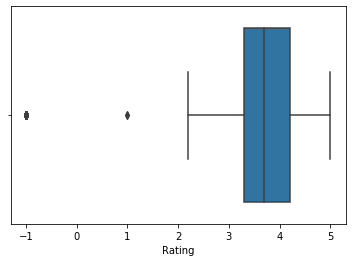

In [22]:
#sns.set(style="whitegrid")
sns.boxplot(x=df["Rating"])

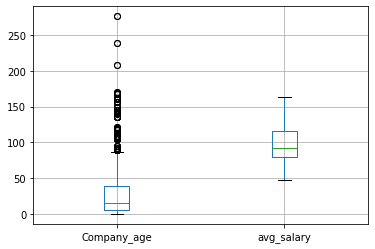

In [23]:
df.boxplot(column=['Company_age','avg_salary'])

In [24]:
corr=df[['Company_age','avg_salary','Rating','Desc Length','Competitors Length']].corr()

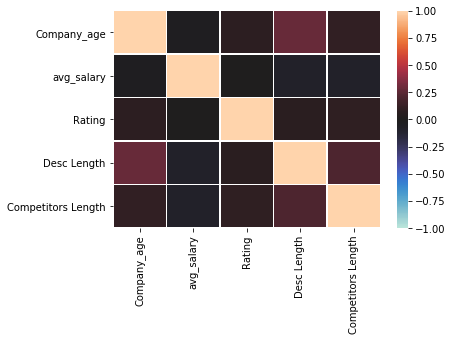

In [25]:
sns.heatmap(corr,vmax=1,vmin=-1,center=0,linewidths=.5)

### Categorical variables


In [26]:
cat=list(categorical_cols.columns)
cat

['Company Name',
 'Competitors',
 'Headquarters',
 'Industry',
 'Job Description',
 'Job Title',
 'Location',
 'Revenue',
 'Salary Estimate',
 'Sector',
 'Size',
 'Type of ownership',
 'City',
 'State',
 'Country',
 'At_hq',
 'Python',
 'R',
 'Spark',
 'AWS',
 'Excel',
 'Hadoop',
 'Tableau',
 'Power_bi',
 'BI',
 'Job Simplified',
 'Job Senioriry']

In [27]:
for i in range(len(cat)):
    print("The categorical feature name is: \n",cat[i])
    print("______________________________________\n")
    print("The number of different values: \n",categorical_cols[cat[i]].value_counts().count())
    

The categorical feature name is: 
 Company Name
______________________________________

The number of different values: 
 541
The categorical feature name is: 
 Competitors
______________________________________

The number of different values: 
 150
The categorical feature name is: 
 Headquarters
______________________________________

The number of different values: 
 269
The categorical feature name is: 
 Industry
______________________________________

The number of different values: 
 58
The categorical feature name is: 
 Job Description
______________________________________

The number of different values: 
 616
The categorical feature name is: 
 Job Title
______________________________________

The number of different values: 
 200
The categorical feature name is: 
 Location
______________________________________

The number of different values: 
 241
The categorical feature name is: 
 Revenue
______________________________________

The number of different values: 
 14
The cate

In [28]:
L_cat=[]
for i in categorical_cols:
    if categorical_cols[i].value_counts().count()<15:
        L_cat.append(i)
c=df[L_cat]

In [29]:
fig, ax = plt.subplots(6,3, figsize=(100,160))
for i,sub  in zip(L_cat,ax.flatten()):
    cat_num=c[i].value_counts()
    sns.barplot(x=cat_num.index,y=cat_num,ax=sub,data=c)
    sub.set_title(i,fontsize="70")
    #sub.legend(cat_num.index,fontsize='90')
    for l in sub.get_xticklabels():
        l.set_rotation(90)   
        l.set_fontsize(70)
    for l in sub.get_yticklabels():
        l.set_fontsize(70)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [30]:
H_cat=[]
for i in categorical_cols:
    if categorical_cols[i].value_counts().count()>=15:
        H_cat.append(i)
H_cat.remove('Job Description')
hc=df[H_cat]

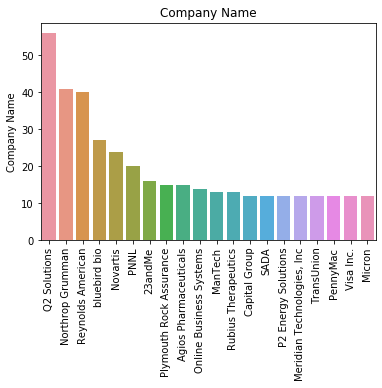

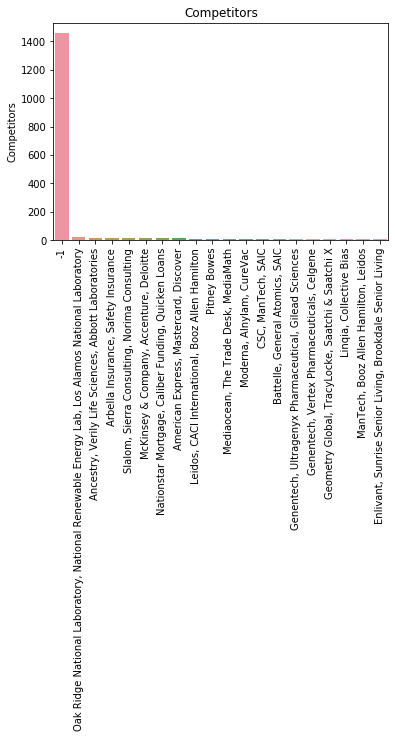

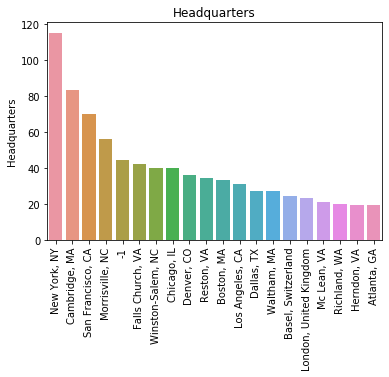

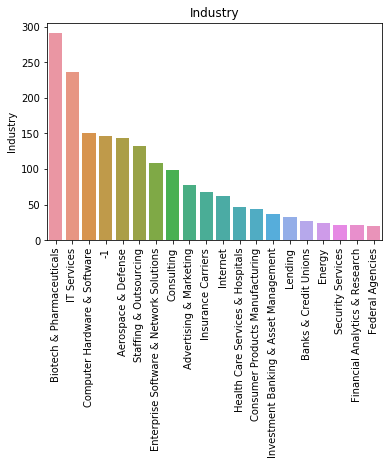

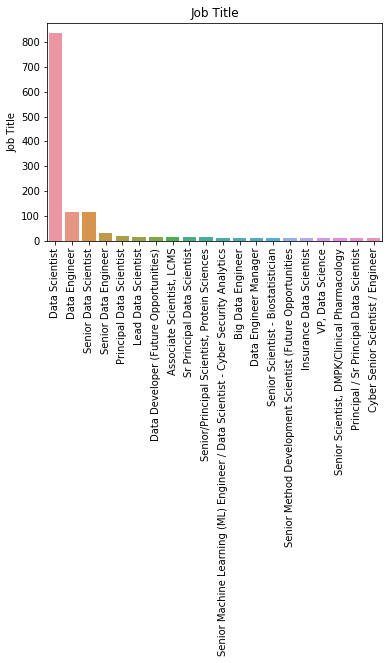

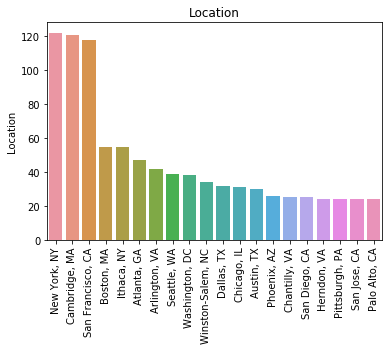

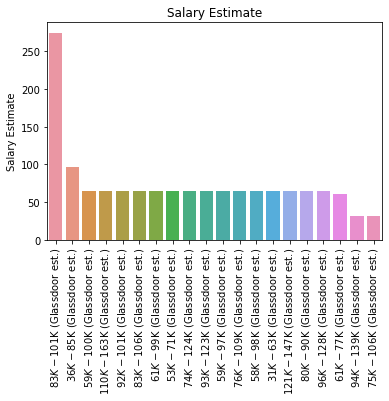

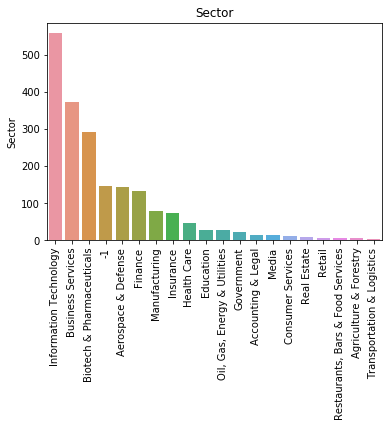

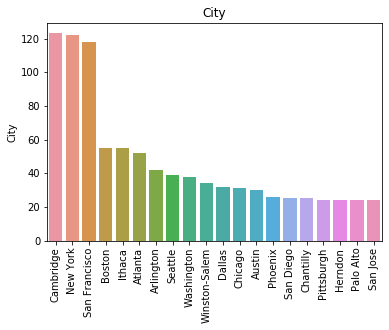

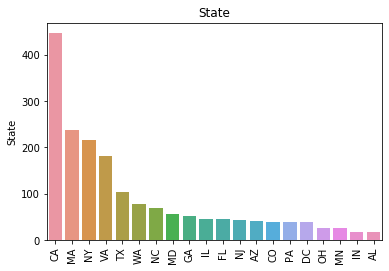

In [31]:
for i in H_cat:
    cat_num=hc[i].value_counts()[:20]
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_title(i)
    plt.show()

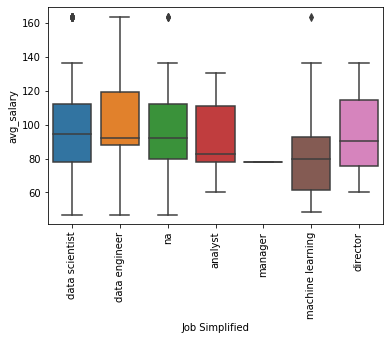

In [32]:
chart=sns.boxplot(df['Job Simplified'],df['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

plt.show()

In [33]:
pivot=pd.pivot_table(df,index='Job Simplified',values="avg_salary")
pivot.sort_values(by='avg_salary',ascending=False)

,avg_salary
Job Simplified,
data engineer,99.892857
na,96.476667
data scientist,96.190135
director,95.125000
analyst,92.833333
machine learning,85.657895
manager,78.000000


In [34]:
pivot=pd.pivot_table(df,index=['Job Simplified','Job Senioriry'],values='avg_salary')
pivot.sort_values(by='avg_salary',ascending=False)

avg_salary
Job Simplified   Job Senioriry            
na               na             105.360465
data scientist   junior         101.173077
data engineer    na             100.553571
                 senior          99.562500
analyst          senior          97.562500
data scientist   na              97.308094
na               senior          95.874667
data scientist   senior          95.532429
director         senior          95.125000
na               junior          91.593750
machine learning senior          88.833333
analyst          na              83.375000
manager          senior          78.000000
machine learning na              73.750000

In [35]:
pivot=pd.pivot_table(df,index=['State'],values='avg_salary')
pivot=pivot.sort_values(by='State',ascending=True)

In [36]:
count=df['State'].value_counts().sort_index()
pivot=pd.concat([pivot,count], axis=1)

In [37]:
pivot.columns=['avg_salary','n_jobs']

In [38]:
pivot.sort_values(by='avg_salary',ascending=False)[:20]

,avg_salary,n_jobs
State,,
Warsaw,124.000000,1
KY,121.083333,6
CT,120.454545,11
BC,119.250000,4
UT,115.375000,8
DC,104.342105,38
NY,101.182028,217
MO,100.058824,17
DE,99.791667,12


In [39]:
pd.set_option("display.max_rows",None)

In [40]:
pivot=pd.pivot_table(df,index=['State','Job Simplified'],values='avg_salary',aggfunc='count')
pivot.sort_values(by='State',ascending=True)

avg_salary
State      Job Simplified              
AB         data scientist             2
AL         data engineer              4
           data scientist            11
           na                         2
AZ         data engineer             17
           data scientist            13
           na                        12
BC         data engineer              4
CA         data engineer             59
           data scientist           311
           director                   2
           na                        75
CO         na                         6
           data engineer              2
           data scientist            31
CT         data engineer              2
           data scientist             9
DC         data engineer              1
           data scientist            37
DE         data scientist             7
           na                         5
FL         na                         6
           analyst                    2
           data engineer              7
           data scientist            30
GA         na                         9
           data scientist            43
HI         data scientist             2
IA         data engineer              2
ID         analyst                    2
           data scientist             2
IL         data engineer             10
           data scientist            20
           machine learning           5
           na                        10
IN         data engineer              3
           data scientist            13
           na                         2
KS         na                         2
           data scientist             4
KY         na                         6
LA         data engineer             12
MA         data engineer              9
           data scientist           122
           machine learning           4
           na                       103
MB         na                        14
MD         data scientist            43
           na                        14
MI         data scientist             3
MN         data scientist            13
           na                         5
           data engineer              7
MO         data scientist            12
           na                         5
NC         data engineer              2
           data scientist            22
           na                        45
NE         data scientist             6
NH         data scientist             5
NJ         analyst                    2
           data engineer              4
           data scientist            30
           na                         7
NM         data scientist            10
NV         data scientist             2
NY         analyst                    1
           data engineer             26
           data scientist           110
           director                   6
           manager                    2
           na                        72
NotDefined data engineer              2
           data scientist             7
OH         data engineer              7
           data scientist            18
OK         data engineer              4
           data scientist             2
ON         na                         4
           data scientist             6
OR         data scientist             2
           na                         2
PA         analyst                    5
           data scientist            19
           machine learning           6
           na                         9
SC         data engineer              3
           data scientist             2
           na                         4
TN         data scientist             2
           na                         2
           data engineer              2
TX         data engineer             32
           data scientist            65
           na                         7
UT         data scientist             8
VA         data engineer             12
           data scientist           155
           na                

In [41]:
pivot=pd.pivot_table(df[df['Job Simplified']=='data scientist'],index='State',values='avg_salary')
pivot.sort_values(by='avg_salary',ascending=False)

,avg_salary
State,
Warsaw,124.000000
CT,119.388889
UT,115.375000
KS,114.125000
AZ,104.461538
DC,103.810811
NY,102.790909
MO,101.750000
GA,101.395349


In [42]:
#rating , industry,sector,
#revenue ,number of comp ,hourly ,employer provided,python ,r ,
#spark,desc length,type of ownership

In [43]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'City', 'State', 'Country', 'At_hq',
       'Company_age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Hadoop',
       'Tableau', 'Power_bi', 'BI', 'Min_revenue', 'Max_revenue',
       'Average_revenue', 'Job Simplified', 'Job Senioriry', 'Desc Length',
       'Competitors Length'],
      dtype='object')

In [44]:
df_pivot=df[['Rating','Industry','Sector','Revenue','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI','Competitors Length','Type of ownership','avg_salary']]

In [45]:
for i in df_pivot.columns:
    print(i,"\n")
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values(by='avg_salary',ascending=False),'\n')

Rating 

        avg_salary
Rating            
 2.5    127.000000
 2.7    107.062500
 2.4    105.264706
 2.6    104.958333
 4.4    103.147727
 2.3    101.166667
 4.3    100.941176
 1.0    100.250000
 4.1     99.896396
 3.1     99.395833
 5.0     99.174699
 4.6     99.133929
 4.5     98.990909
 4.2     98.218391
 2.9     98.175325
 4.9     97.684211
 3.5     97.481982
-1.0     97.282609
 3.8     96.831579
 4.8     96.166667
 3.7     96.009259
 3.2     95.425000
 3.6     95.092025
 3.9     93.959538
 4.0     93.216667
 4.7     92.607143
 3.3     91.562500
 3.4     91.512500
 2.8     90.700000
 3.0     89.863636
 2.2     78.000000 

Industry 

                                         avg_salary
Industry                                           
Sporting Goods Stores                    130.000000
Building & Personnel Services            127.000000
Transportation Management                124.000000
Colleges & Universities                  120.178571
Research & Development                 

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivot,index='Revenue',columns='Python',values='avg_salary',aggfunc='count')

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df["Job Description"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 500, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 